In [1]:
#cloning the git repo for the dataset
!git clone https://github.com/techytushar/Sign-Language-Recognizer

fatal: destination path 'Sign-Language-Recognizer' already exists and is not an empty directory.


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Conv2D, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import os
import cv2

In [6]:
#X is the training set, Y is the train lables
X = np.zeros((1,100,100,1), dtype=float)
Y = np.zeros((1,10),dtype=float)

In [7]:
# reading images, converting to grayscale and adding them to array
path = "./Sign-Language-Recognizer/Dataset"
for i in os.listdir(path):
    print(f"Reading images for number {i}")
    for j in os.listdir(f'{path}/{i}'):
        img = cv2.imread(f'{path}/{i}/{j}')
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        try:
            assert np.prod(gray.shape) == 10000
        except AssertionError as e:
            gray = cv2.resize(gray, (100,100))
        gray = gray/255
        gray = gray.reshape(1,100,100,1)
        X = np.vstack((X,gray))
        y = np.zeros((1,10))
        y[0,int(i)] = 1
        Y = np.vstack((Y,y))

Reading images for number 9
Reading images for number 0
Reading images for number 7
Reading images for number 6
Reading images for number 1
Reading images for number 8
Reading images for number 4
Reading images for number 3
Reading images for number 2
Reading images for number 5


In [8]:
# removing the zeros array and shuffeling the data
X = X[1:,:,:,:]
Y = Y[1:,:]
X,Y = shuffle(X,Y)
print(X.shape, Y.shape)

(2661, 100, 100, 1) (2661, 10)


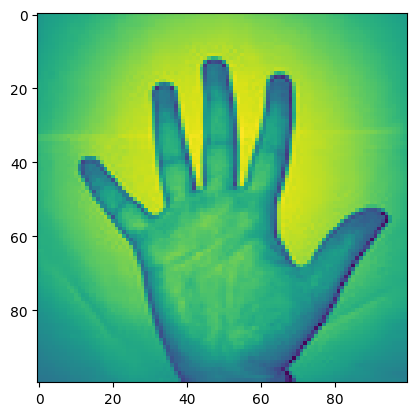

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
#visualizing the images
image_number=1999
plt.imshow(X[image_number,:,:].reshape(100,100))
plt.show()
print(Y[image_number])

In [10]:
#splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1)
print(X_train.shape, X_test.shape)

(2394, 100, 100, 1) (267, 100, 100, 1)


In [11]:
#defining the model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, padding="same",  input_shape=(100, 100, 1), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation="softmax"))

/Users/suhanighosh/Downloads/Sign-Language-Recognizer-master/tensorflow_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-27 22:09:26.572906: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-02-27 22:09:26.573119: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-02-27 22:09:26.573124: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-02-27 22:09:26.573175: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-02-27 22:09:26.573435: I tensorflow/core/common_run

In [12]:
#training the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=['accuracy'])
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=47, batch_size=128)

Epoch 1/47


2025-02-27 22:09:31.199811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - accuracy: 0.0996 - loss: 4.4088 - val_accuracy: 0.0899 - val_loss: 2.2973
Epoch 2/47
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.1252 - loss: 2.2988 - val_accuracy: 0.1648 - val_loss: 2.2674
Epoch 3/47
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.1988 - loss: 2.2401 - val_accuracy: 0.4457 - val_loss: 1.9457
Epoch 4/47
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.3292 - loss: 1.8834 - val_accuracy: 0.5843 - val_loss: 1.3121
Epoch 5/47
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.5093 - loss: 1.3908 - val_accuracy: 0.6592 - val_loss: 1.0094
Epoch 6/47
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.5692 - loss: 1.2651 - val_accuracy: 0.6854 - val_loss: 0.9387
Epoch 7/47
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.6305 - loss: 1.1164 - val_accuracy: 0.7004 - val_loss: 0.8943
Epoch 8/47
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.6715 - loss: 1.0657 - val_accuracy: 0.7303 - val_

In [13]:
#saving the model
model.save("hand_sign_keras.h5")